#### 简介：该数据集包含心血管疾病数据，由70000条患者数据和多个相关特征组成，可以被用于探索不同特征对心血管疾病的影响。
#### 变量含义：
- id：身份证号码
- age：年龄，以天为单位
- gender：性别，1-女性，2-男性
- height：身高，厘米
- weight：体重，公斤
- ap_hi：收缩压
- ap_lo：舒张压
- cholesterol：胆固醇，1:正常，2:高于正常，3:远高于正常
- gluc：胶质，1:正常，2:高于正常，3:远高于正常
- smoke：病人是否吸烟
- alco：病人是否喝酒
- active：是否身体运动
- cardio：是否存在心血管疾病

### 读取数据

In [1]:
import pandas as pd
import numpy as np

In [2]:
cardio_original = pd.read_csv('cardio.csv')
cardio_original.head(5)

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


### 评估与清洗数据

In [3]:
cleaned_data = cardio_original.copy()
cleaned_data.sample(5)

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
11780,16825;21315;1;168;65.0;110;70;1;1;0;0;1;0
40239,57514;20617;1;166;50.0;120;80;1;1;0;0;0;0
6486,9223;21220;1;250;86.0;140;100;3;1;0;0;1;1
38174,54487;18194;2;175;78.0;150;90;1;1;1;0;1;1
25620,36558;18100;1;160;66.0;110;70;2;1;0;0;1;0


#### 评估数据整齐程度：数据不符合一列是一个变量，一个单元格是一个观察值的原则。需进行拆分。

In [4]:
cleaned_data = cleaned_data['id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio'].str.split(';',expand=True)

In [5]:
column_names = ['id','age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
cleaned_data.columns = column_names

In [6]:
cleaned_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### 评估缺失数据和数据类型

In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           70000 non-null  object
 1   age          70000 non-null  object
 2   gender       70000 non-null  object
 3   height       70000 non-null  object
 4   weight       70000 non-null  object
 5   ap_hi        70000 non-null  object
 6   ap_lo        70000 non-null  object
 7   cholesterol  70000 non-null  object
 8   gluc         70000 non-null  object
 9   smoke        70000 non-null  object
 10  alco         70000 non-null  object
 11  active       70000 non-null  object
 12  cardio       70000 non-null  object
dtypes: object(13)
memory usage: 6.9+ MB


In [8]:
## 不存在缺失数据。age，height，weight，ap_hi，ap_lo的数据类型错误，需要逐一修改。
cleaned_data['age'] = cleaned_data['age'].astype('int')
cleaned_data['height'] = cleaned_data['height'].astype('int')
cleaned_data['weight'] = cleaned_data['weight'].astype('float')
cleaned_data['ap_hi'] = cleaned_data['ap_hi'].astype('int')
cleaned_data['ap_lo'] = cleaned_data['ap_lo'].astype('int')

In [9]:
## 分类数据的数据类型应该改成catogory。
cleaned_data['cholesterol'] = cleaned_data['cholesterol'].astype('category')
cleaned_data['gender'] = cleaned_data['gender'].astype('category')
cleaned_data['gluc'] = cleaned_data['gluc'].astype('category')
cleaned_data['smoke'] = cleaned_data['smoke'].astype('category')
cleaned_data['alco'] = cleaned_data['alco'].astype('category')
cleaned_data['active'] = cleaned_data['active'].astype('category')
cleaned_data['cardio'] = cleaned_data['cardio'].astype('category')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           70000 non-null  object  
 1   age          70000 non-null  int64   
 2   gender       70000 non-null  category
 3   height       70000 non-null  int64   
 4   weight       70000 non-null  float64 
 5   ap_hi        70000 non-null  int64   
 6   ap_lo        70000 non-null  int64   
 7   cholesterol  70000 non-null  category
 8   gluc         70000 non-null  category
 9   smoke        70000 non-null  category
 10  alco         70000 non-null  category
 11  active       70000 non-null  category
 12  cardio       70000 non-null  category
dtypes: category(7), float64(1), int64(4), object(1)
memory usage: 3.7+ MB


### 评估重复数据

In [10]:
cleaned_data[cleaned_data.duplicated()]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


### 评估不一致数据

In [11]:
cleaned_data['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

In [12]:
cleaned_data['cholesterol'].value_counts()

cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64

In [13]:
cleaned_data['gluc'].value_counts()

gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64

In [14]:
cleaned_data['smoke'].value_counts()

smoke
0    63831
1     6169
Name: count, dtype: int64

In [15]:
cleaned_data['alco'].value_counts()

alco
0    66236
1     3764
Name: count, dtype: int64

In [16]:
cleaned_data['active'].value_counts()

active
1    56261
0    13739
Name: count, dtype: int64

In [17]:
cleaned_data['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

### 评估错误或无效数据

In [18]:
cleaned_data.describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,128.817286,96.630414
std,2467.251667,8.210126,14.395757,154.011419,188.472530
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000


In [19]:
### 舒张压和收缩压有出现负数，不符合常理，提取出来。
cleaned_data[cleaned_data['ap_hi'] < 0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4607,6525,15281,1,165,78.0,-100,80,2,1,0,0,1,0
16021,22881,22108,2,161,90.0,-115,70,1,1,0,0,1,0
20536,29313,15581,1,153,54.0,-100,70,1,1,0,0,1,0
23988,34295,18301,1,162,74.0,-140,90,1,1,0,0,1,1
25240,36025,14711,2,168,50.0,-120,80,2,1,0,0,0,1
35040,50055,23325,2,168,59.0,-150,80,1,1,0,0,1,1
46627,66571,23646,2,160,59.0,-120,80,1,1,0,0,0,0


In [20]:
cleaned_data[cleaned_data['ap_lo'] < 0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
60106,85816,22571,1,167,74.0,15,-70,1,1,0,0,1,1


In [21]:
### 删除以上无效错误数据，保证样本的准确性。
cleaned_data = cleaned_data[(cleaned_data['ap_hi'] > 0) & (cleaned_data['ap_lo'] > 0)]
cleaned_data.describe()

,age,height,weight,ap_hi,ap_lo
count,69971.000000,69971.000000,69971.000000,69971.000000,69971.000000
mean,19468.928299,164.359363,74.208362,128.779066,96.663603
std,2466.989497,8.210512,14.395224,153.858001,188.502998
min,10798.000000,55.000000,10.000000,1.000000,1.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000


In [22]:
### 舒张压和收缩压的最小值和最大值不符合现实情况，应筛选出合理的范围数据。
cleaned_data = cleaned_data[(60 < cleaned_data['ap_hi']) & (cleaned_data['ap_hi'] < 250)]
cleaned_data = cleaned_data[(30 < cleaned_data['ap_lo']) & (cleaned_data['ap_lo'] < 150)]
cleaned_data.describe()

,age,height,weight,ap_hi,ap_lo
count,68746.000000,68746.000000,68746.000000,68746.000000,68746.000000
mean,19464.316426,164.361548,74.119971,126.614858,81.348704
std,2468.139391,8.184892,14.330958,16.739119,9.526851
min,10798.000000,55.000000,11.000000,70.000000,40.000000
25%,17657.000000,159.000000,65.000000,120.000000,80.000000
50%,19701.000000,165.000000,72.000000,120.000000,80.000000
75%,21324.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,240.000000,140.000000


### 探索数据和数据可视化

In [23]:
cleaned_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [76]:
## 导入用到的工具库
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('pastel')

#### 年龄与心血管疾病的关系

In [77]:
## 对年龄进行数据分箱，再探究年龄对心血管疾病的影响。
age_bins = [10789,14600,18250,21900,23713]
age_labels = ['30-40','40-50','50-60','60-65']
cleaned_data['age_cut'] = pd.cut(cleaned_data['age'],age_bins,labels = age_labels)
cleaned_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_cut,BMI,BMI_cut,aver_ap
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50-60,18.452381,thin,95.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,50-60,27.243590,overweight,115.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,50-60,19.393939,normal,100.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,40-50,24.260355,normal,125.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,40-50,17.948718,thin,80.0


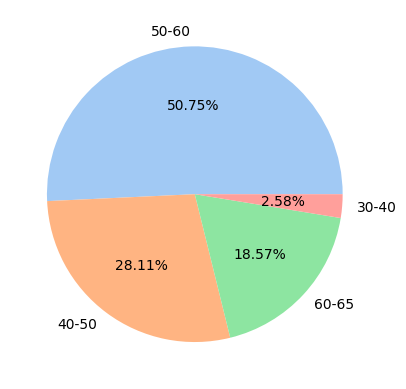

In [78]:
s1 = cleaned_data['age_cut'].value_counts()
plt.pie(s1,labels = s1.index,autopct = '%.2f%%')
plt.show()

##### 样本中，50-60岁年龄段的样本数占一半。其次是40-50年龄组、60岁以上的你年龄组。

<function matplotlib.pyplot.show(close=None, block=None)>

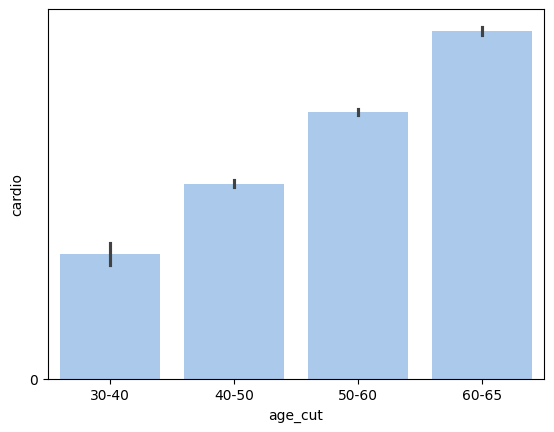

In [79]:
sns.barplot(cleaned_data,x = 'age_cut',y = 'cardio')
plt.gca().invert_yaxis()
plt.show

##### 得出结论：年龄越大，患病几率越高。患病几率与年龄成正比。

#### 性别与心血管疾病的关系

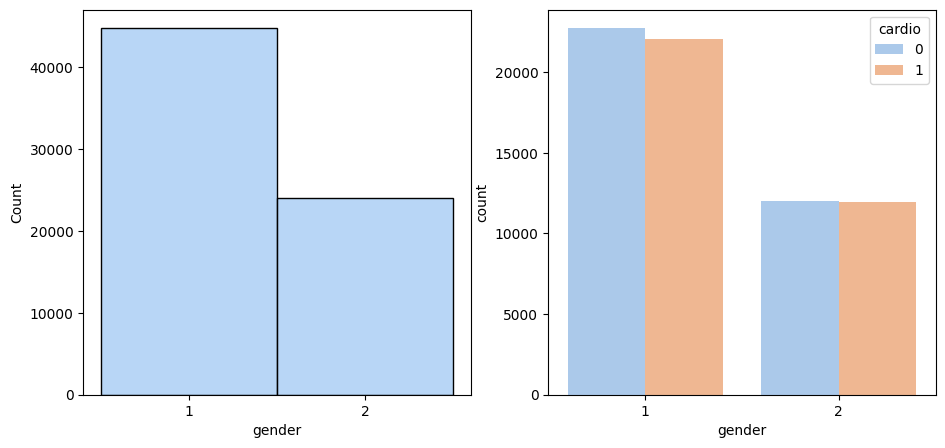

In [80]:
sns.set_palette('pastel')
figure, axes = plt.subplots(1, 2,figsize = [11,5])
sns.histplot(cleaned_data,x = 'gender', ax=axes[0])
sns.countplot(cleaned_data,x = 'gender',hue = 'cardio',ax=axes[1])
plt.show()

##### 样本中，女性的数量大约是男性的一倍，且女性中，不患病的数量约高于患病的数量。男性中，患病数和不患病的数量大致相等。

#### 身高体重对心血管疾病的影响

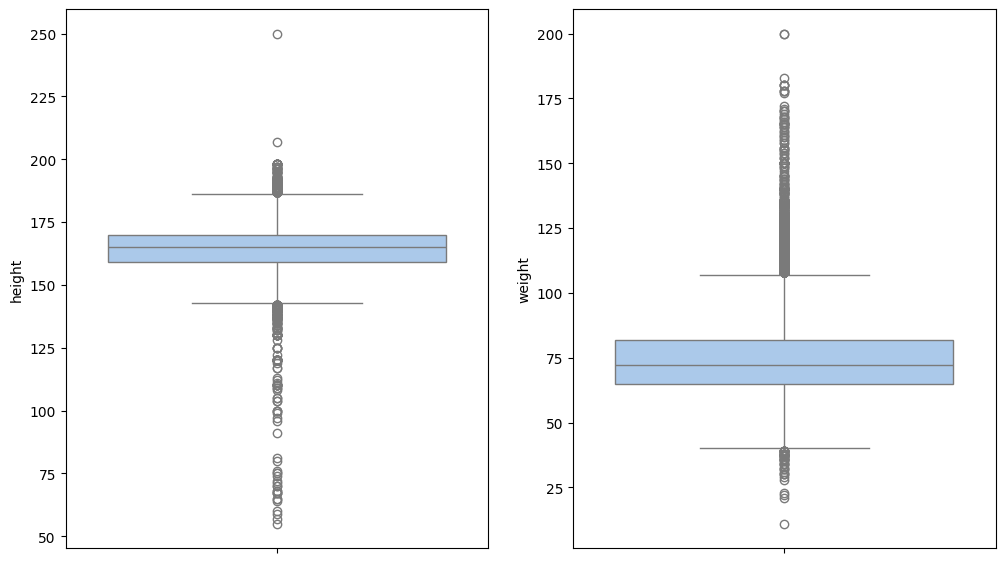

In [81]:
figure, axes = plt.subplots(1, 2, figsize=[12, 7])
sns.boxplot(cleaned_data,y = 'height', ax=axes[0])
sns.boxplot(cleaned_data,y = 'weight', ax=axes[1])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

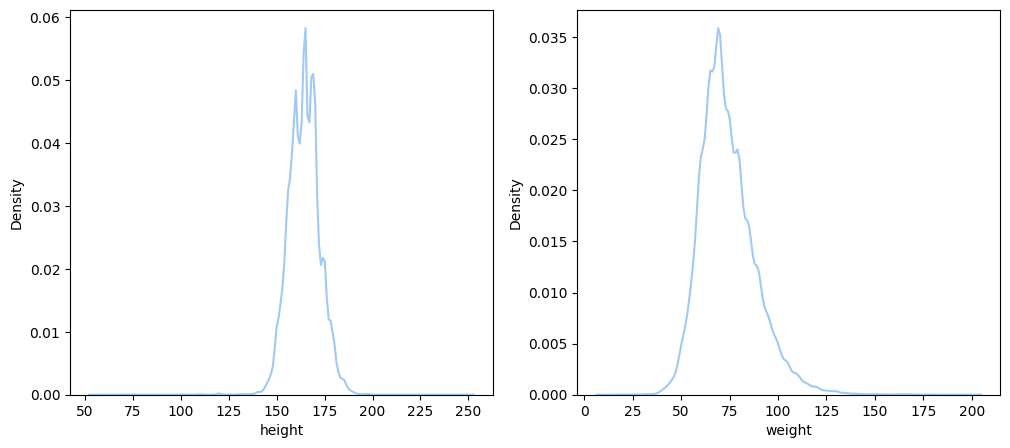

In [82]:
figure, axes = plt.subplots(1, 2, figsize=[12, 5])
sns.kdeplot(cleaned_data,x = 'height',ax=axes[0])
sns.kdeplot(cleaned_data,x = 'weight', ax=axes[1])
plt.show

In [83]:
## 身高呈正态分布。体重呈右偏态分布。说明数据集中的大部分身高和体重中等，被一些少数极端值拉高均值。
## 引入新变量BMI，进行数据分箱。
cleaned_data['BMI'] = cleaned_data['weight']/(cleaned_data['height']*0.01*2)
BMI_bins = [0,18.5,24.9,29.9,50]
BMI_labels = ['thin','normal','overweight','fat']
cleaned_data['BMI_cut'] = pd.cut(cleaned_data['BMI'],BMI_bins,labels = BMI_labels)
cleaned_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_cut,BMI,BMI_cut,aver_ap
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50-60,18.452381,thin,95.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,50-60,27.243590,overweight,115.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,50-60,19.393939,normal,100.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,40-50,24.260355,normal,125.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,40-50,17.948718,thin,80.0


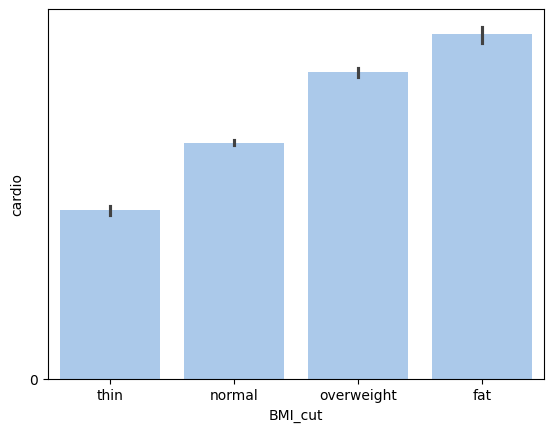

In [97]:
sns.barplot(cleaned_data,x = 'BMI_cut',y = 'cardio')
plt.gca().invert_yaxis()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

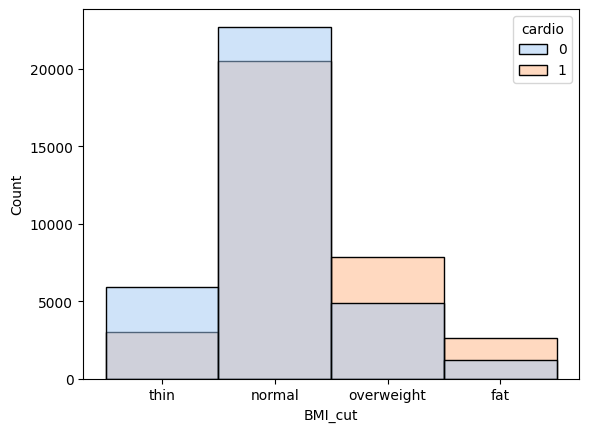

In [85]:
sns.histplot(cleaned_data,x = 'BMI_cut',hue = 'cardio')
plt.show

##### 数据证明，大部分人都是正常的BMI值范围内。患心血管疾病的概率与BMI值成正比，这意味着约肥胖的人患病率越高。只有偏瘦和正常BMI的样本健康的人数较多，其余都是患病的人数大于不患病的人数。

#### 收缩压和舒张压对心血管疾病的影响

In [86]:
## 设定新变量aver ap，用于计算样本血压的平均值。
cleaned_data['aver_ap'] = (cleaned_data['ap_hi'] + cleaned_data['ap_lo']) / 2
cleaned_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_cut,BMI,BMI_cut,aver_ap
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50-60,18.452381,thin,95.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,50-60,27.243590,overweight,115.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,50-60,19.393939,normal,100.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,40-50,24.260355,normal,125.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,40-50,17.948718,thin,80.0


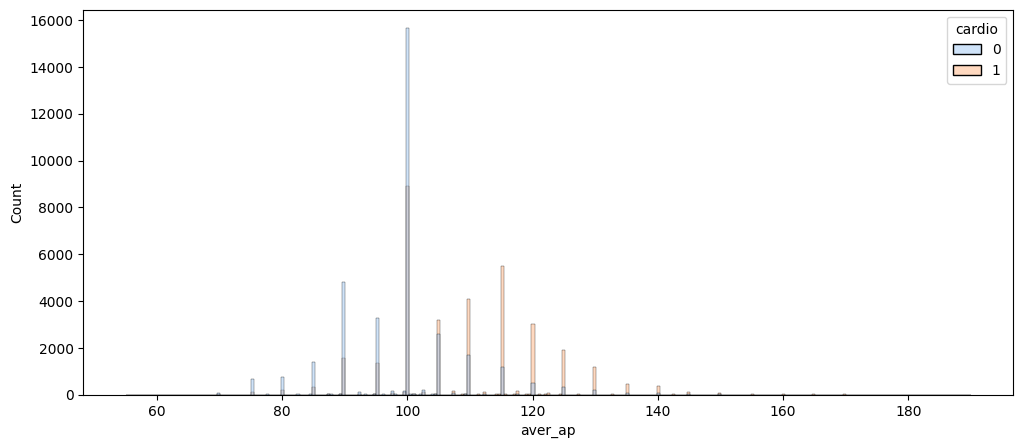

In [87]:
plt.subplots(1, 1, figsize=[12, 5])
sns.histplot(cleaned_data,x = 'aver_ap',hue = 'cardio')
plt.show()

##### 观察图表可知，平均血压小于等于100时，样本中不患病的数量较多。但当平均血压大于100时，患病的数量远大于不患病的数量。

 #### 胆固醇对心血管疾病的影响

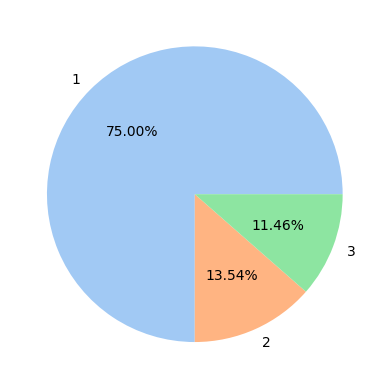

In [88]:
s2 = cleaned_data['cholesterol'].value_counts()
plt.pie(s2,labels = s2.index,autopct = '%.2f%%')
plt.show()

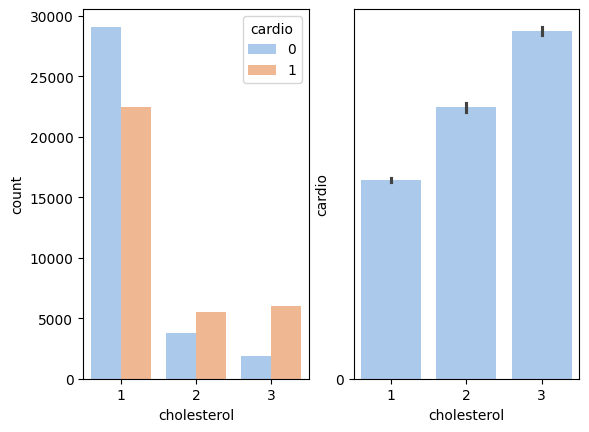

In [89]:
figure, axes = plt.subplots(1, 2)
sns.countplot(cleaned_data,x = 'cholesterol',hue = 'cardio',ax = axes[0])
sns.barplot(cleaned_data,x ='cholesterol',y = 'cardio',ax = axes[1])
plt.gca().invert_yaxis()
plt.show()

##### 样本中，胆固醇为正常范围的人数最多，占3/4。随着胆固醇越来越高，患病数量的占比也在提升。得出结论：胆固醇越高，患病概率越高。

#### 胶质对心血管疾病的影响

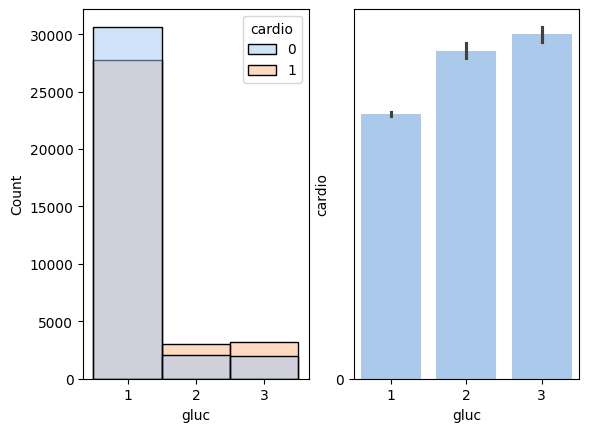

In [90]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_data,x = 'gluc',hue = 'cardio',ax = axes[0])
sns.barplot(cleaned_data,x ='gluc',y = 'cardio',ax = axes[1])
plt.gca().invert_yaxis()
plt.show()

##### 大部分样本胶质为正常值。在正常值中，未患病人数大于患病人数。在高于正常值样本中，皆是患病人数大于未患病人数。胶质越高，患病的概率也上升。

#### 抽烟和喝酒对心血管疾病的影响

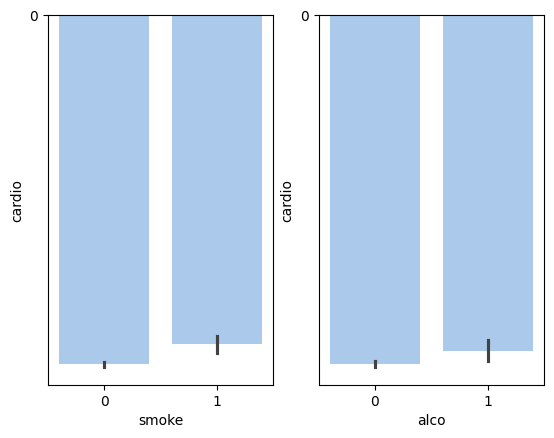

In [95]:
figure, axes = plt.subplots(1, 2)
sns.barplot(cleaned_data,x ='smoke',y = 'cardio',ax = axes[0])
sns.barplot(cleaned_data,x ='alco',y = 'cardio',ax = axes[1])
plt.show()

##### 抽烟和喝酒对心血管疾病的影响并不十分明显，患病概率接近。

#### 运动对心血管疾病的影响

In [92]:
cleaned_data['active'].value_counts()

active
1    55229
0    13517
Name: count, dtype: int64

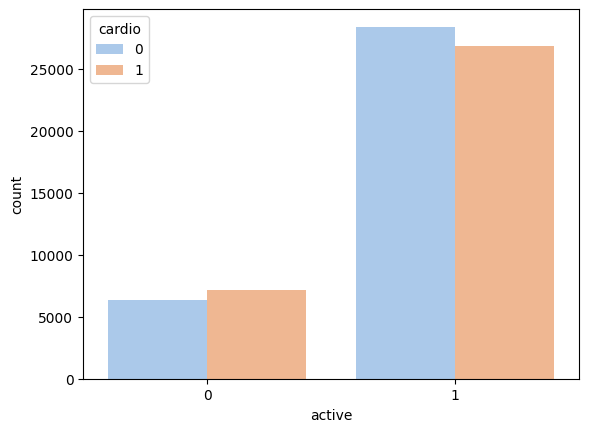

In [93]:
sns.countplot(cleaned_data,x = 'active',hue = 'cardio')
plt.show()

##### 不运动会增加患心血管疾病的概率。

### 保存清洗后的数据

In [42]:
cleaned_data.to_csv('cleaned_cardio_data.csv',index = False)

### 建立回归模型

In [43]:
import statsmodels.api as sm

In [44]:
## 删除不影响因变量的自变量
lr_cleaned = cleaned_data.copy()
lr_cleaned = lr_cleaned.drop(['age_cut','BMI_cut','id'],axis = 1)
lr_cleaned.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,aver_ap
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,18.452381,95.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,27.243590,115.0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,19.393939,100.0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,24.260355,125.0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,17.948718,80.0


In [45]:
## 将年龄的单位转化成岁
lr_cleaned['age(years)'] = lr_cleaned['age'] / 365
lr_cleaned = lr_cleaned.drop('age',axis = 1)
lr_cleaned.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,aver_ap,age(years)
0,2,168,62.0,110,80,1,1,0,0,1,0,18.452381,95.0,50.391781
1,1,156,85.0,140,90,3,1,0,0,1,1,27.243590,115.0,55.419178
2,1,165,64.0,130,70,3,1,0,0,0,1,19.393939,100.0,51.663014
3,2,169,82.0,150,100,1,1,0,0,1,1,24.260355,125.0,48.282192
4,1,156,56.0,100,60,1,1,0,0,0,0,17.948718,80.0,47.873973


In [46]:
## 把分类变量转化成虚拟变量
lr_cleaned = pd.get_dummies(lr_cleaned,columns = ['gender','cholesterol','gluc','smoke','alco','active'],drop_first=True,dtype = int)
lr_cleaned.head()

,height,weight,ap_hi,ap_lo,cardio,BMI,aver_ap,age(years),gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke_1,alco_1,active_1
0,168,62.0,110,80,0,18.452381,95.0,50.391781,1,0,0,0,0,0,0,1
1,156,85.0,140,90,1,27.243590,115.0,55.419178,0,0,1,0,0,0,0,1
2,165,64.0,130,70,1,19.393939,100.0,51.663014,0,0,1,0,0,0,0,0
3,169,82.0,150,100,1,24.260355,125.0,48.282192,1,0,0,0,0,0,0,1
4,156,56.0,100,60,0,17.948718,80.0,47.873973,0,0,0,0,0,0,0,0


In [47]:
## 回归模型中的自变量和因变量都应该是数字类型，将cardio修改为int。
lr_cleaned['cardio'] = lr_cleaned['cardio'].astype('int')

In [48]:
## 指定自变量和因变量
y = lr_cleaned['cardio']
x = lr_cleaned.drop('cardio',axis = 1)
print(y.dtype)

int64


In [49]:
##检查自变量之间的相关性，并删除会导致共线性问题的自变量。
x.corr().abs()

,height,weight,ap_hi,ap_lo,BMI,aver_ap,age(years),gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke_1,alco_1,active_1
height,1.000000,0.291779,0.018245,0.036083,0.006385,0.026565,0.081429,0.499333,0.024394,0.040680,0.012830,0.013747,0.188307,0.095227,0.007481
weight,0.291779,1.000000,0.269918,0.251950,0.951924,0.283123,0.054619,0.156026,0.067063,0.114371,0.094730,0.068679,0.067019,0.067875,0.017718
ap_hi,0.018245,0.269918,1.000000,0.709145,0.272783,0.961479,0.208488,0.061169,0.099463,0.153439,0.075895,0.062778,0.027204,0.033183,0.001275
ap_lo,0.036083,0.251950,0.709145,1.000000,0.249682,0.875635,0.154310,0.068157,0.073073,0.131530,0.061191,0.051415,0.025805,0.041030,0.000055
BMI,0.006385,0.951924,0.272783,0.249682,1.000000,0.284201,0.078520,0.022722,0.073637,0.128361,0.099568,0.074118,0.017399,0.043087,0.016776
aver_ap,0.026565,0.283123,0.961479,0.875635,0.284201,1.000000,0.202976,0.068473,0.096622,0.156386,0.075845,0.063048,0.028695,0.038726,0.000852
age(years),0.081429,0.054619,0.208488,0.154310,0.078520,0.202976,1.000000,0.023236,0.021918,0.153804,0.024880,0.094625,0.047900,0.029047,0.010399
gender_2,0.499333,0.156026,0.061169,0.068157,0.022722,0.068473,0.023236,1.000000,0.017688,0.029469,0.005358,0.019996,0.338816,0.171473,0.005853
cholesterol_2,0.024394,0.067063,0.099463,0.073073,0.073637,0.096622,0.021918,0.017688,1.000000,0.142398,0.273738,0.054044,0.024694,0.038610,0.005438
cholesterol_3,0.040680,0.114371,0.153439,0.131530,0.128361,0.156386,0.153804,0.029469,0.142398,1.000000,0.013821,0.481833,0.002707,0.017014,0.012359


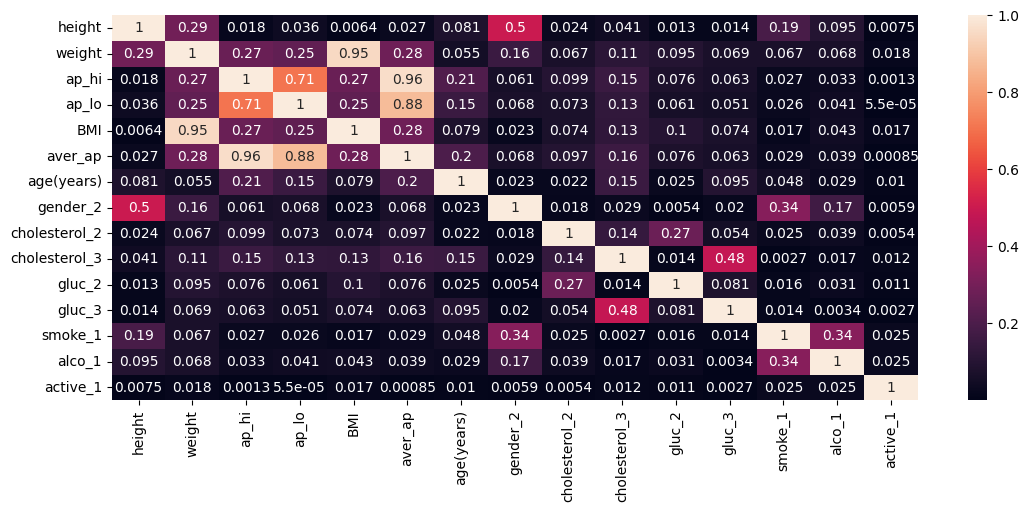

In [50]:
plt.subplots(1, 1, figsize=[13, 5])
sns.heatmap(x.corr().abs(), annot = True)
plt.show()

In [51]:
## aver_ap是由ap_hi和ap_lo计算得来的，所以他们之间的相关性很强，大于0.8，应删除ap_hi和ap_lo两个自变量。
## 由于BMI值是由height和weight计算得来的，都保留会导致共线性问题，且weight和BMI相关性大于0.8，应删除weight。
x = x.drop(['ap_hi','ap_lo','weight'],axis = 1)
x.corr().abs() > 0.8

,height,BMI,aver_ap,age(years),gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke_1,alco_1,active_1
height,True,False,False,False,False,False,False,False,False,False,False,False
BMI,False,True,False,False,False,False,False,False,False,False,False,False
aver_ap,False,False,True,False,False,False,False,False,False,False,False,False
age(years),False,False,False,True,False,False,False,False,False,False,False,False
gender_2,False,False,False,False,True,False,False,False,False,False,False,False
cholesterol_2,False,False,False,False,False,True,False,False,False,False,False,False
cholesterol_3,False,False,False,False,False,False,True,False,False,False,False,False
gluc_2,False,False,False,False,False,False,False,True,False,False,False,False
gluc_3,False,False,False,False,False,False,False,False,True,False,False,False
smoke_1,False,False,False,False,False,False,False,False,False,True,False,False


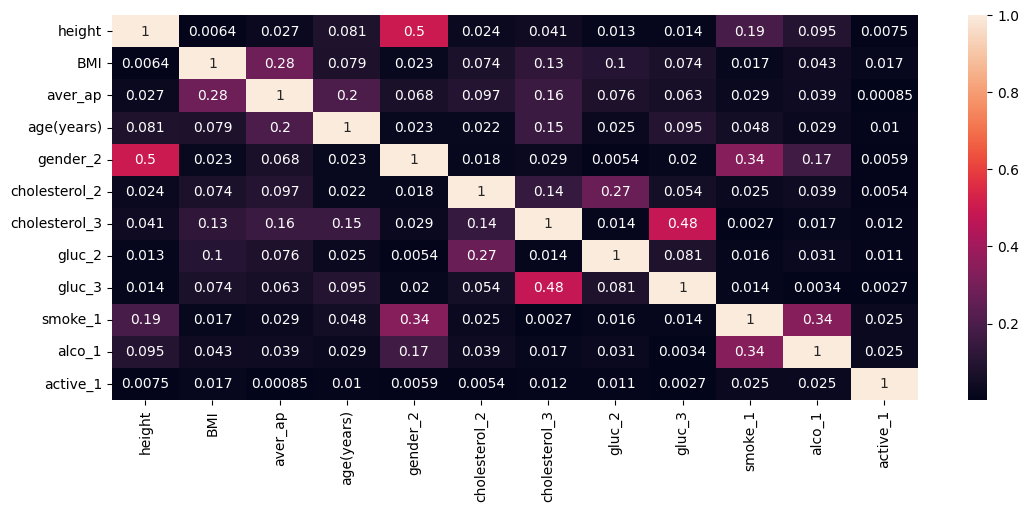

In [52]:
plt.subplots(1, 1, figsize=[13, 5])
sns.heatmap(x.corr().abs(), annot = True)
plt.show()

In [53]:
## 计算截距
x = sm.add_constant(x)

In [54]:
## 建立回归模型
model = sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.563338
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                68746
Model:                          Logit   Df Residuals:                    68733
Method:                           MLE   Df Model:                           12
Date:                Fri, 22 Aug 2025   Pseudo R-squ.:                  0.1872
Time:                        09:28:38   Log-Likelihood:                -38727.
converged:                       True   LL-Null:                       -47647.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -12.1048      0.240    -50.533      0.000     -12.574     -11.635
height            0.0015      0.001      1.233      0.218      -0.001       0.004
BMI               0.0340      0.002     15.313      0.000       0.030       0.038
aver_ap           0.0805      0.001     84.966      0.000       0.079       0.082
age(years)        0.0524      0.001     38.796      0.000       0.050       0.055
gender_2         -0.0238      0.022     -1.089      0.276      -0.067       0.019
cholesterol_2     0.3929      0.027     14.433      0.000       0.340       0.446
cholesterol_3     1.0968      0.036     30.818      0.000       1.027       1.167
gluc_2            0.0220      0.036      0.610      0.542      -0.049       0.093
gluc_3           -0.3318      0.039     -8.425      0.000      -0.409      -0.255
smoke_1          -0.1329      0.035     -3.834      0.000      -0.201      -0.065
alco_1           -0.2236      0.042     -5.299      0.000      -0.306      -0.141
active_1         -0.2270      0.022    -10.399      0.000      -0.270      -0.184
=================================================================================
"""

In [55]:
## 当设置显著水平为0.05时，模型认为height、gluc_2和gender_2自变量对是否患心血管疾病没有影响，移除该自变量，再次建立回归模型。
x = x.drop(['gender_2','gluc_2','height'],axis = 1)
model = sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.563354
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                68746
Model:                          Logit   Df Residuals:                    68736
Method:                           MLE   Df Model:                            9
Date:                Fri, 22 Aug 2025   Pseudo R-squ.:                  0.1872
Time:                        09:28:38   Log-Likelihood:                -38728.
converged:                       True   LL-Null:                       -47647.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.8545      0.122    -97.255      0.000     -12.093     -11.616
BMI               0.0341      0.002     15.387      0.000       0.030       0.038
aver_ap           0.0805      0.001     85.070      0.000       0.079       0.082
age(years)        0.0522      0.001     38.852      0.000       0.050       0.055
cholesterol_2     0.3972      0.026     15.170      0.000       0.346       0.448
cholesterol_3     1.0973      0.036     30.892      0.000       1.028       1.167
gluc_3           -0.3331      0.039     -8.489      0.000      -0.410      -0.256
smoke_1          -0.1381      0.033     -4.172      0.000      -0.203      -0.073
alco_1           -0.2245      0.042     -5.331      0.000      -0.307      -0.142
active_1         -0.2274      0.022    -10.420      0.000      -0.270      -0.185
=================================================================================
"""

#### 模型认为，自变量因素的增加对因变量的影响如下：

In [56]:
## BMI
np.exp(0.0341)

np.float64(1.0346880703618861)

In [57]:
## 血压平均值
np.exp(0.0805)

np.float64(1.0838288466422508)

In [58]:
## 年龄
np.exp(0.0522)

np.float64(1.053586438730787)

In [59]:
## 胆固醇_高于正常值
np.exp(0.3972)

np.float64(1.4876534309864187)

In [60]:
## 胆固醇_严重高于正常值
np.exp(1.0973)

np.float64(2.9960657160184168)

以上数据表明：
- BMI值每增加1，患心血管疾病概率提升3.47%；
- 血压的平均值每增加1，患病概率提升8.38%，比BMI值对心血管的影响高出5%；
- 年龄每增加一岁，患病概率提升5.36%；
- 胆固醇处在高于正常值范畴内，患病概率是正常胆固醇的1.48倍；而如果胆固醇处在严重高于正常值范畴的话，患病概率是正常值的199%，属于强致病因素。

In [61]:
## 胶质
np.exp(-0.3331)

np.float64(0.7166985207200148)

In [62]:
## 吸烟
np.exp(-0.1381)

np.float64(0.8710115862319721)

In [63]:
## 饮酒
np.exp(-0.2245)

np.float64(0.7989155766999219)

In [64]:
## 运动
np.exp(-0.2247)

np.float64(0.7987558095618282)

以上数据表明
- 胶质、吸烟和喝酒会降低患病的概率，不符合常理，需要复核数据准确性。
- 运动会降低21%左右的患心血管疾病的风险。